In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
PFE_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/PFE_predictions_RFC.csv", index_col=0)


In [3]:
PFE_predictions.head()

Date  Predictions
0  2019-07-31            0
1  2019-06-28            0
2  2019-05-31            1
3  2019-04-30            1
4  2019-03-29            1

In [4]:
PFE_predictions.Date = pd.to_datetime(PFE_predictions.Date, format="%Y-%m-%d")

In [5]:
PFE_predictions['Predictions'] = PFE_predictions['Predictions'].shift(-1)


In [6]:
PFE_predictions = PFE_predictions.dropna()


In [7]:
PFE_predictions = PFE_predictions[::-1]

In [8]:
PFE_predictions.head(10)

Date  Predictions
112 2010-03-31          0.0
111 2010-04-30          0.0
110 2010-05-28          0.0
109 2010-06-30          1.0
108 2010-07-30          1.0
107 2010-08-31          1.0
106 2010-09-30          1.0
105 2010-10-29          1.0
104 2010-11-30          1.0
103 2010-12-31          1.0

In [9]:
PFE_monthly = pd.read_csv("/Users/fahad/project_repo/data/final/PFE/PFE_monthly.csv", index_col =0)

In [10]:
PFE_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
PFE_predictions = PFE_predictions.set_index("Date")

In [12]:
PFE_monthly.tail()

Open     High     Low   Close     Volume
2000-01-31  32.063  37.6232  30.000  36.188  238967700
1999-12-31  36.125  36.5000  32.188  32.438  256858000
1999-11-30  39.500  40.0000  33.313  36.625  309933000
1999-10-29  35.625  42.2500  35.625  39.688  198564400
1999-09-30  38.188  39.4380  33.750  35.875  128297400

In [13]:
PFE_final_df = pd.merge(PFE_predictions, PFE_monthly, right_index=True, left_index=True)

In [14]:
PFE_final_df.index = pd.to_datetime(PFE_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

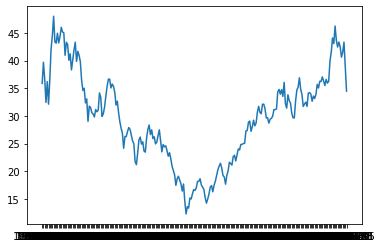

In [16]:
plt.plot(PFE_monthly.index[::-1], PFE_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] == 0.0  and (position.is_short != True):
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(PFE_final_df, Binary_Classification_1d, cash=10000, commission=.02)
bt.run()



Start                          2010-03-31 00:00:00
End                            2019-07-31 00:00:00
Duration                        3409 days 00:00:00
Exposure [%]                                86.653
Equity Final [$]                           28584.1
Equity Peak [$]                            34022.7
Return [%]                                 185.841
Buy & Hold Return [%]                      126.472
Max. Drawdown [%]                         -23.6076
Avg. Drawdown [%]                         -6.34431
Max. Drawdown Duration           914 days 00:00:00
Avg. Drawdown Duration           163 days 00:00:00
# Trades                                        27
Win Rate [%]                               55.5556
Best Trade [%]                             44.4947
Worst Trade [%]                           -10.7826
Avg. Trade [%]                             4.13985
Max. Trade Duration              579 days 00:00:00
Avg. Trade Duration              110 days 00:00:00
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/RFC/PFE_RFC_Equity.csv")

In [25]:
df

Equity
2010-04-30  10000.000000
2010-05-28  10720.121382
2010-06-30  11286.181139
2010-07-30  11596.626741
2010-08-31  12300.155429
2010-09-30  13274.272076
2010-10-29  13467.549188
2010-11-30  12601.667725
2010-12-31  13537.128948
2011-01-31  14086.035948
2011-02-28  14874.606566
2011-03-31  15701.832607
2011-04-29  16212.084183
2011-05-31  16583.176239
2011-06-30  15926.034057
2011-07-29  14882.337650
2011-08-31  14673.598369
2011-09-30  13668.557385
2011-10-31  14890.068735
2011-11-30  15516.286579
2011-12-30  16730.066844
2012-01-31  16544.520817
2012-02-29  16197.379964
2012-03-30  17118.508310
2012-04-30  17307.454318
2012-05-31  16528.996766
2012-06-29  17383.032721
2012-07-31  18169.048114
2012-08-31  18033.006988
2012-09-28  18781.233179
...                  ...
2017-02-28  29807.900807
2017-03-31  29886.526572
2017-04-28  29633.176887
2017-05-31  30088.486868
2017-06-30  30311.939479
2017-07-31  29903.377943
2017-08-31  30204.734756
2017-09-29  31789.770955
2017-10-31  31219.870299
2017-11-30  29472.803522
2017-12-29  28813.542631
2018-01-31  29465.864690
2018-02-28  28885.138955
2018-03-29  28232.816897
2018-04-30  29123.793367
2018-05-31  27476.453993
2018-06-29  26700.093011
2018-07-31  29386.293107
2018-08-31  30556.446026
2018-09-28  32433.106367
2018-10-31  31689.801683
2018-11-30  34022.748068
2018-12-31  32124.009370
2019-01-31  31240.875091
2019-02-28  31903.225800
2019-03-29  31255.593996
2019-04-30  29886.735865
2019-05-31  30556.446026
2019-06-28  31881.147443
2019-07-31  28584.112805

[112 rows x 1 columns]